In [1]:
#General Approach, Explore and preprocess the data.
#Do 10-fold cross validation with limited parameter values.
#On the entire training dataset.
#Visualize decision boundaries
#Get accuracies, remember that these accuracies will be overfit
#Do train-test split of 70-30, and use the training dataset with k-fold
#cross-validation to explore the hyperparameter space of the best classifier
#Do a final evaluation on the model, report accuracy and full evaluation report


In [2]:
import pandas as pd

df_test = pd.read_csv('./EP_Dataset5/test.csv')

In [3]:
print(df_test.columns)

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [4]:
#labels are in the 'Survived' column. We won't touch the test dataset.

df_train = pd.read_csv('./EP_Dataset5/train.csv')
print(df_train.dtypes)
df_train = df_train.convert_dtypes()
df_train.shape

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


(891, 12)

In [5]:
# PassengerIds are unique to the passengers, this data has high dimensionality and lacks any meaningful information
# Names are also unique, too much of a hassle to encode this data.
df_train['Ticket'].unique

<bound method Series.unique of 0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: string>

In [6]:
from collections import Counter

counts = Counter(df_train['Ticket'])
counts = sorted(counts.items(), key=lambda pair: pair[1], reverse=True)

print(counts[:50])

[('347082', 7), ('1601', 7), ('CA. 2343', 7), ('3101295', 6), ('CA 2144', 6), ('347088', 6), ('382652', 5), ('S.O.C. 14879', 5), ('349909', 4), ('347077', 4), ('19950', 4), ('W./C. 6608', 4), ('4133', 4), ('LINE', 4), ('113781', 4), ('17421', 4), ('PC 17757', 4), ('113760', 4), ('2666', 4), ('347742', 3), ('SC/Paris 2123', 3), ('PC 17572', 3), ('C.A. 34651', 3), ('371110', 3), ('230080', 3), ('363291', 3), ('35273', 3), ('C.A. 31921', 3), ('110152', 3), ('PC 17755', 3), ('110413', 3), ('PC 17582', 3), ('PC 17760', 3), ('13502', 3), ('239853', 3), ('F.C.C. 13529', 3), ('29106', 3), ('345773', 3), ('248727', 3), ('24160', 3), ('113803', 2), ('237736', 2), ('PP 9549', 2), ('239865', 2), ('PC 17569', 2), ('PC 17604', 2), ('113789', 2), ('345764', 2), ('2651', 2), ('11668', 2)]


In [7]:
#First 50 hits show that most of the common ticket types are found in the top 10
#Next we will 

print(counts[:10])

[('347082', 7), ('1601', 7), ('CA. 2343', 7), ('3101295', 6), ('CA 2144', 6), ('347088', 6), ('382652', 5), ('S.O.C. 14879', 5), ('349909', 4), ('347077', 4)]


In [8]:
# Build the news category list
yCategories = [_[0] for _ in counts[:10]]
yCategories += ['other']

# Sanity check
print(f'K categories for classification= {len(yCategories):d} categories, {yCategories}')

K categories for classification= 11 categories, ['347082', '1601', 'CA. 2343', '3101295', 'CA 2144', '347088', '382652', 'S.O.C. 14879', '349909', '347077', 'other']


In [9]:
yCat = []
for cat in df_train['Ticket']:
    bFound = False
    for _ in yCategories:
        if _ in cat:
            yCat += [_]
            bFound = True
            break  # So we add only one category for a news text
    if not bFound:
        yCat += ['other']
        
# Sanity check
print(f'N target categories={len(yCat):d}')
print(yCat[:50])

N target categories=891
['other', 'other', 'other', 'other', 'other', 'other', 'other', '349909', 'other', 'other', 'other', 'other', 'other', '347082', 'other', 'other', '382652', 'other', 'other', 'other', 'other', 'other', 'other', 'other', '349909', '347077', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other']


In [10]:
import numpy as np

# Convert to numerical np.array which sklearn requires
ydocs = np.array([yCategories.index(_) for _ in yCat])

In [11]:
print(ydocs[0:50])

[10 10 10 10 10 10 10  8 10 10 10 10 10  0 10 10  6 10 10 10 10 10 10 10
  8  9 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10]


In [12]:
df_train['Ticket']=ydocs
df_train.dtypes

PassengerId      Int64
Survived         Int64
Pclass           Int64
Name            string
Sex             string
Age            Float64
SibSp            Int64
Parch            Int64
Ticket           int64
Fare           Float64
Cabin           string
Embarked        string
dtype: object

In [13]:
from collections import Counter

counts = Counter(df_train['Cabin'])
counts = sorted(counts.items(), key=lambda pair: pair[1], reverse=True)
print(counts[:100])

[(<NA>, 687), ('G6', 4), ('C23 C25 C27', 4), ('B96 B98', 4), ('F33', 3), ('E101', 3), ('F2', 3), ('D', 3), ('C22 C26', 3), ('C123', 2), ('D33', 2), ('C52', 2), ('B28', 2), ('C83', 2), ('F G73', 2), ('D26', 2), ('B58 B60', 2), ('C2', 2), ('E33', 2), ('F4', 2), ('D36', 2), ('C93', 2), ('C78', 2), ('D35', 2), ('B77', 2), ('E67', 2), ('C125', 2), ('B49', 2), ('C65', 2), ('B57 B59 B63 B66', 2), ('B18', 2), ('C124', 2), ('B35', 2), ('E44', 2), ('C92', 2), ('D20', 2), ('E25', 2), ('B22', 2), ('C68', 2), ('C126', 2), ('B51 B53 B55', 2), ('B5', 2), ('B20', 2), ('E24', 2), ('E8', 2), ('E121', 2), ('D17', 2), ('C85', 1), ('E46', 1), ('C103', 1), ('D56', 1), ('A6', 1), ('B78', 1), ('B30', 1), ('E31', 1), ('A5', 1), ('D10 D12', 1), ('C110', 1), ('F E69', 1), ('D47', 1), ('B86', 1), ('B19', 1), ('A7', 1), ('C49', 1), ('A32', 1), ('B4', 1), ('B80', 1), ('A31', 1), ('D15', 1), ('C87', 1), ('B94', 1), ('C99', 1), ('C118', 1), ('D7', 1), ('A19', 1), ('C106', 1), ('E36', 1), ('C54', 1), ('C7', 1), ('E34'

In [14]:
#The data is very sparse, first, most rooms have no data on them, those that are are single, and the data shows bad distribution.
#We should delete this column as it's similar to the Passenger Id.
# exclude name and food_id column
df_train = df_train.loc[:, ~df_train.columns.isin(['PassengerId', 'Cabin'])]
df_train.dtypes

Survived      Int64
Pclass        Int64
Name         string
Sex          string
Age         Float64
SibSp         Int64
Parch         Int64
Ticket        int64
Fare        Float64
Embarked     string
dtype: object

In [15]:
from sklearn.preprocessing import LabelEncoder


np.array(df_train['Embarked']) 

array(['S', 'C', 'S', 'S', 'S', 'Q', 'S', 'S', 'S', 'C', 'S', 'S', 'S',
       'S', 'S', 'S', 'Q', 'S', 'S', 'C', 'S', 'S', 'Q', 'S', 'S', 'S',
       'C', 'S', 'Q', 'S', 'C', 'C', 'Q', 'S', 'C', 'S', 'C', 'S', 'S',
       'C', 'S', 'S', 'C', 'C', 'Q', 'S', 'Q', 'Q', 'C', 'S', 'S', 'S',
       'C', 'S', 'C', 'S', 'S', 'C', 'S', 'S', 'C', <NA>, 'S', 'S', 'C',
       'C', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'C', 'S', 'S', 'S', 'S',
       'S', 'S', 'S', 'S', 'Q', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S',
       'S', 'S', 'S', 'S', 'S', 'C', 'C', 'S', 'S', 'S', 'S', 'S', 'S',
       'S', 'S', 'S', 'S', 'S', 'Q', 'S', 'C', 'S', 'S', 'C', 'S', 'Q',
       'S', 'C', 'S', 'S', 'S', 'C', 'S', 'S', 'C', 'Q', 'S', 'C', 'S',
       'C', 'S', 'S', 'S', 'S', 'C', 'S', 'S', 'S', 'C', 'C', 'S', 'S',
       'Q', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'C',
       'Q', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S',
       'S', 'S', 'Q', 'S', 'S', 'C', 'S', 'S', 'C', 'S', 'S', '

In [16]:
df_train.dropna(subset=['Embarked'], inplace = True)

In [17]:
np.array(df_train['Embarked'])

array(['S', 'C', 'S', 'S', 'S', 'Q', 'S', 'S', 'S', 'C', 'S', 'S', 'S',
       'S', 'S', 'S', 'Q', 'S', 'S', 'C', 'S', 'S', 'Q', 'S', 'S', 'S',
       'C', 'S', 'Q', 'S', 'C', 'C', 'Q', 'S', 'C', 'S', 'C', 'S', 'S',
       'C', 'S', 'S', 'C', 'C', 'Q', 'S', 'Q', 'Q', 'C', 'S', 'S', 'S',
       'C', 'S', 'C', 'S', 'S', 'C', 'S', 'S', 'C', 'S', 'S', 'C', 'C',
       'S', 'S', 'S', 'S', 'S', 'S', 'S', 'C', 'S', 'S', 'S', 'S', 'S',
       'S', 'S', 'S', 'Q', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S',
       'S', 'S', 'S', 'S', 'C', 'C', 'S', 'S', 'S', 'S', 'S', 'S', 'S',
       'S', 'S', 'S', 'S', 'Q', 'S', 'C', 'S', 'S', 'C', 'S', 'Q', 'S',
       'C', 'S', 'S', 'S', 'C', 'S', 'S', 'C', 'Q', 'S', 'C', 'S', 'C',
       'S', 'S', 'S', 'S', 'C', 'S', 'S', 'S', 'C', 'C', 'S', 'S', 'Q',
       'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'C', 'Q',
       'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S',
       'S', 'Q', 'S', 'S', 'C', 'S', 'S', 'C', 'S', 'S', 'S', 'C

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(np.array(df_train['Embarked']))
le.classes_
df_train['Embarked'] = le.transform(df_train['Embarked'])

In [19]:
#S->2 C->0 Q->1

df_train.dtypes

Survived      Int64
Pclass        Int64
Name         string
Sex          string
Age         Float64
SibSp         Int64
Parch         Int64
Ticket        int64
Fare        Float64
Embarked      int64
dtype: object

In [20]:
#The name data could also be removed, since it's difficult to incorporate that information into our classifier
df_train = df_train.loc[:, df_train.columns != 'Name']
df_train.dtypes

Survived      Int64
Pclass        Int64
Sex          string
Age         Float64
SibSp         Int64
Parch         Int64
Ticket        int64
Fare        Float64
Embarked      int64
dtype: object

In [21]:
#Finally, sex needs binary encoding

se = LabelEncoder()
se.fit(np.array(df_train['Sex']))
se.classes_
df_train['Sex'] = se.transform(df_train['Sex'])

In [22]:
#male is 1, female is 0
df_train['Sex']

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 889, dtype: int64

In [23]:
df_train = df_train.convert_dtypes()
df_train.dtypes

Survived      Int64
Pclass        Int64
Sex           Int64
Age         Float64
SibSp         Int64
Parch         Int64
Ticket        Int64
Fare        Float64
Embarked      Int64
dtype: object

In [24]:
#Now that our data is of the correct format, and encoded, we will do a final check for missing values.
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    Int64  
 1   Pclass    889 non-null    Int64  
 2   Sex       889 non-null    Int64  
 3   Age       712 non-null    Float64
 4   SibSp     889 non-null    Int64  
 5   Parch     889 non-null    Int64  
 6   Ticket    889 non-null    Int64  
 7   Fare      889 non-null    Float64
 8   Embarked  889 non-null    Int64  
dtypes: Float64(2), Int64(7)
memory usage: 77.3 KB


In [25]:
#A significant portion of the age data is null. One could use the median for missing value imputation,
#it's more robus than the mean.
df_train['Age'].fillna(df_train['Age'].median(), inplace=True)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    Int64  
 1   Pclass    889 non-null    Int64  
 2   Sex       889 non-null    Int64  
 3   Age       889 non-null    Float64
 4   SibSp     889 non-null    Int64  
 5   Parch     889 non-null    Int64  
 6   Ticket    889 non-null    Int64  
 7   Fare      889 non-null    Float64
 8   Embarked  889 non-null    Int64  
dtypes: Float64(2), Int64(7)
memory usage: 77.3 KB


In [26]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [27]:
#testing that Embark encoding will produce the same outcome: S->2, C->0, Q->1
print(df_test['Embarked'])
le = LabelEncoder()
le.fit(np.array(df_test['Embarked']))
le.classes_
df_test['Embarked'] = le.transform(df_test['Embarked'])
print(df_test['Embarked'])

0      Q
1      S
2      Q
3      S
4      S
      ..
413    S
414    C
415    S
416    S
417    C
Name: Embarked, Length: 418, dtype: object
0      1
1      2
2      1
3      2
4      2
      ..
413    2
414    0
415    2
416    2
417    0
Name: Embarked, Length: 418, dtype: int64


In [28]:
#male should be 1, female should be 0
print(df_test['Sex'])
se = LabelEncoder()
se.fit(np.array(df_test['Sex']))
se.classes_
df_test['Sex'] = se.transform(df_test['Sex'])
print(df_test['Sex'])

0        male
1      female
2        male
3        male
4      female
        ...  
413      male
414    female
415      male
416      male
417      male
Name: Sex, Length: 418, dtype: object
0      1
1      0
2      1
3      1
4      0
      ..
413    1
414    0
415    1
416    1
417    1
Name: Sex, Length: 418, dtype: int64


In [29]:
#Now we will do the same for the test dataset  but in one cell
from collections import Counter

df_test = df_test.convert_dtypes()
counts = Counter(df_test['Ticket'])
counts = sorted(counts.items(), key=lambda pair: pair[1], reverse=True)

# Build the news category list
yCategories = [_[0] for _ in counts[:10]]
yCategories += ['other']

yCat = []
for cat in df_test['Ticket']:
    bFound = False
    for _ in yCategories:
        if _ in cat:
            yCat += [_]
            bFound = True
            break  # So we add only one category for a news text
    if not bFound:
        yCat += ['other']
        
ydocs = np.array([yCategories.index(_) for _ in yCat])
df_test['Ticket']=ydocs
df_test.dtypes
pass_ID = df_test[['PassengerId']]
df_test = df_test.loc[:, ~df_test.columns.isin(['PassengerId', 'Cabin'])]
df_test = df_test.loc[:, df_test.columns != 'Name']
df_test = df_test.convert_dtypes()
df_test['Age'].fillna(df_test['Age'].median(), inplace=True)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    Int64  
 1   Sex       418 non-null    Int64  
 2   Age       418 non-null    Float64
 3   SibSp     418 non-null    Int64  
 4   Parch     418 non-null    Int64  
 5   Ticket    418 non-null    Int64  
 6   Fare      417 non-null    Float64
 7   Embarked  418 non-null    Int64  
dtypes: Float64(2), Int64(6)
memory usage: 29.5 KB


In [30]:
#Fill the last missing fare with the median fare amount
df_test['Fare'].fillna(df_test['Fare'].median(), inplace=True)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    Int64  
 1   Sex       418 non-null    Int64  
 2   Age       418 non-null    Float64
 3   SibSp     418 non-null    Int64  
 4   Parch     418 non-null    Int64  
 5   Ticket    418 non-null    Int64  
 6   Fare      418 non-null    Float64
 7   Embarked  418 non-null    Int64  
dtypes: Float64(2), Int64(6)
memory usage: 29.5 KB


-------------------------------------------------------------------------------------------------------

Now we will see the distribution of our labels in our training dataset

<Axes: >

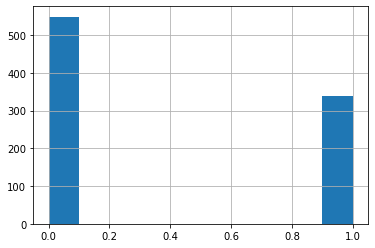

In [31]:
df_train['Survived'].hist()

The class label is very marginally imbalanced. So we do not have to employ stratification. Let's quickly plot a scatter matrix.

<Figure size 1440x720 with 0 Axes>

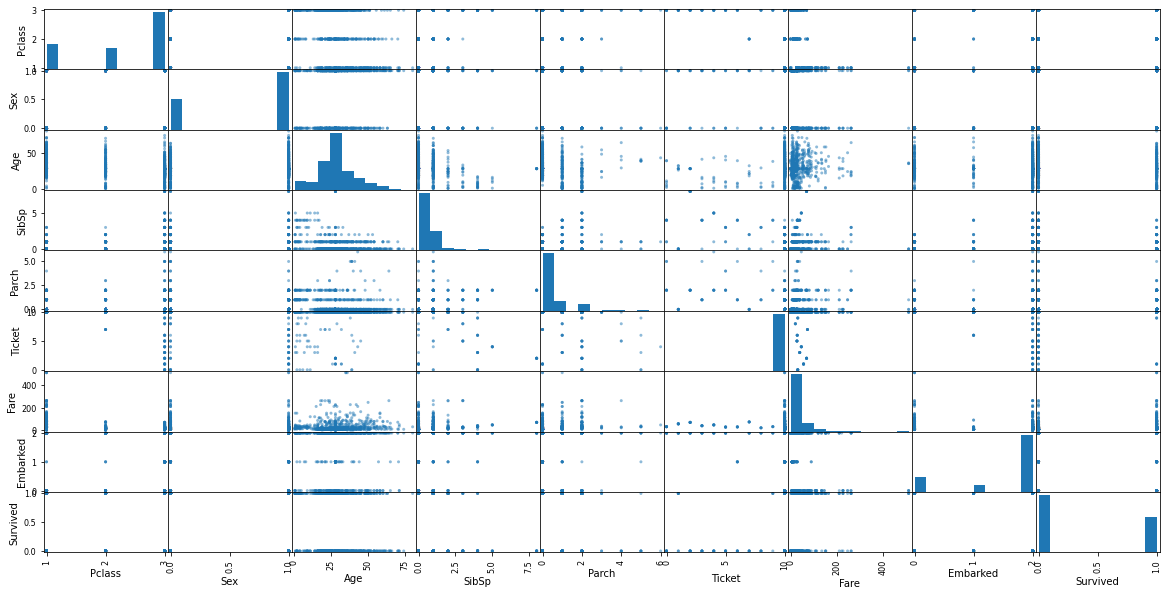

In [32]:
#Scatter matrix for checking outlier
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
attributes = ['Pclass', 'Sex', 'Age','SibSp','Parch', 'Ticket', 'Fare', 'Embarked', 'Survived']
scatter_matrix(df_train[attributes], figsize=(20,10))
plt.show()

It seems like all but the age data follows a gaussian distribution, and the Fare data seems to have a significant portions of outliers. Now before moving on, I will standardize my numerical data (not the encoded variables): Age and Fare

In [34]:
numerical = ['Age', 'Fare']

from sklearn.preprocessing import RobustScaler

df_Train = df_train
df_Test = df_test


rc = RobustScaler()
print(df_Train[numerical].describe())
df_Train[numerical]= rc.fit_transform(df_Train[numerical])
df_Test[numerical] = rc.fit_transform(df_Test[numerical])
print(df_Train[numerical].describe())

             Age       Fare
count      889.0      889.0
mean   29.315152  32.096681
std    12.984932  49.697504
min         0.42        0.0
25%         22.0     7.8958
50%         28.0    14.4542
75%         35.0       31.0
max         80.0   512.3292
              Age        Fare
count  889.000000  889.000000
mean     0.101166    0.763605
std      0.998841    2.151016
min     -2.121538   -0.625609
25%     -0.461538   -0.283862
50%      0.000000    0.000000
75%      0.538462    0.716138
max      4.000000   21.549112


In [35]:
#sanity check
df_Train

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,1,-0.461538,1,0,10,-0.311813,2
1,1,1,0,0.769231,1,0,10,2.459687,0
2,1,3,0,-0.153846,0,0,10,-0.282598,2
3,1,1,0,0.538462,1,0,10,1.672674,2
4,0,3,1,0.538462,0,0,10,-0.277188,2
...,...,...,...,...,...,...,...,...,...
886,0,2,1,-0.076923,0,0,10,-0.062941,2
887,1,1,0,-0.692308,0,0,10,0.672856,2
888,0,3,0,0.000000,1,2,10,0.389358,2
889,1,1,1,-0.153846,0,0,10,0.672856,0


In [36]:
df_Test

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,1,0.588235,0,0,10,-0.281005,1
1,3,0,1.568627,1,0,10,-0.316176,2
2,2,1,2.745098,0,0,10,-0.202184,1
3,3,1,0.000000,0,0,10,-0.245660,2
4,3,0,-0.392157,1,1,10,-0.091902,2
...,...,...,...,...,...,...,...,...
413,3,1,0.000000,0,0,10,-0.271640,2
414,1,0,0.941176,0,0,10,4.006002,0
415,3,1,0.901961,0,0,10,-0.305572,2
416,3,1,0.000000,0,0,10,-0.271640,2


In [37]:
df_Test[numerical].describe()

,Age,Fare
count,418.000000,418.000000
mean,0.203865,0.895922
std,0.996374,2.368931
min,-2.104314,-0.613088
25%,-0.313725,-0.278180
50%,0.000000,0.000000
75%,0.686275,0.721820
max,3.843137,21.117807


<Axes: title={'center': 'Suicide Correlation'}>

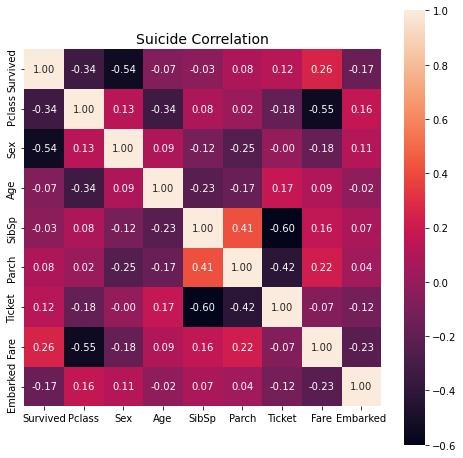

In [38]:
#Now we will determine which features have good correlation with our expected outcome
import seaborn as sns
#  Correlations - OVERALL
dataCorr = df_Train.corr()

#  print correlation
dataCorr['Survived'].sort_values(ascending=False)

#  plot heatmap
plt.figure(figsize=(8,8))
plt.title('Suicide Correlation', fontsize=14)
sns.heatmap(dataCorr, annot=True, fmt='.2f', square=True)

Pclass, Sex, and Fare are all good features to train on. 

In [39]:
df_Train= df_Train[['Pclass', 'Sex', 'Fare','Survived']]
df_Test= df_Test[['Pclass', 'Sex','Fare']]

In [40]:
# Prepare the input X matrix and target y vector
X = df_Train.loc[:, df_Train.columns != 'Survived'].values
y = df_Train.loc[:, df_Train.columns == 'Survived'].values.ravel()
# Sanity check
print(y[0:10])
print(type(y))
print(type(X))
print(X[0:50])

[0 1 1 1 0 0 0 0 1 1]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[[3 1 -0.3118134365180357]
 [1 0 2.4596869833190502]
 [3 0 -0.28259796920040514]
 [1 0 1.6726742323906478]
 [3 1 -0.27718769747491795]
 [3 1 -0.25951558591078683]
 [1 1 1.6191125423083248]
 [3 1 0.28656261632084207]
 [3 0 -0.14373577098536197]
 [2 0 0.6759203954259398]
 [3 0 0.09720310592879214]
 [1 0 0.5235325178971789]
 [3 1 -0.27718769747491795]
 [3 1 0.7280407891205928]
 [3 0 -0.2856623471057211]
 [2 0 0.06690558426606417]
 [3 1 0.634984115442214]
 [2 1 -0.06294093714562721]
 [3 0 0.15346993187385843]
 [3 0 -0.3128954908631332]
 [2 1 0.49972732230503547]
 [2 1 -0.06294093714562721]
 [3 0 -0.2780879666900391]
 [1 1 0.9109079734420582]
 [3 0 0.28656261632084207]
 [3 0 0.7329100336735312]
 [3 1 -0.3128954908631332]
 [1 1 10.757602513828655]
 [3 0 -0.28458029276062363]
 [3 1 -0.28386180867547894]
 [1 1 0.5742072869867817]
 [1 0 5.7161295348897605]
 [3 0 -0.2901723496160871]
 [2 1 -0.17114637165537003]
 [1 1 2.9309216

Naive Bayes

In [41]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report

def kfold_eval_docs(_clf, _X, _y):
    accs = []
    _niter = 10
    for i in range(_niter):
        kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=i)
        for train_index, test_index in kf.split(_X, _y):
            _clf.fit(_X[train_index], _y[train_index])
            ypred = _clf.predict(_X[test_index])
            accs += [accuracy_score(_y[test_index], ypred)]

    return np.array(accs)

In [42]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier


svm_rbf = SVC(kernel='rbf', gamma='scale', class_weight='balanced')
svm_lin = LinearSVC(class_weight='balanced')
nb = MultinomialNB()
rf = RandomForestClassifier(n_jobs=4, n_estimators=300, max_depth=10, random_state=0, class_weight='balanced')
lr = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter =300, class_weight='balanced')
nn = MLPClassifier(hidden_layer_sizes= (100,), learning_rate_init= 0.05, random_state=1)
dt = DecisionTreeClassifier(criterion='entropy', max_depth=None, max_features=50, random_state=1)

In [43]:
#Since multinomial NB needs to work on only positive values, we can fix this by normalizing, instead of standardizing,
#the Fare values.
df_train = df_train[['Pclass', 'Sex', 'Fare','Survived']]

from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
df_train[['Fare']] = min_max_scaler.fit_transform(df_train[['Fare']])

X_norm = df_train.loc[:, df_train.columns != 'Survived'].values
y = y.astype(int)
print(X_norm[0:50])
print(y.dtype)

[[3 1 0.014151057562208049]
 [1 0 0.13913573538264068]
 [3 0 0.015468569817999833]
 [1 0 0.10364429745562034]
 [3 1 0.01571255356907239]
 [3 1 0.01650950209357577]
 [1 1 0.10122885832000206]
 [3 1 0.04113566043083236]
 [3 0 0.021730754366528396]
 [2 0 0.05869429265402011]
 [3 0 0.03259622914329302]
 [1 0 0.051822148727810165]
 [3 1 0.01571255356907239]
 [3 1 0.061044734518352656]
 [3 0 0.015330377421392339]
 [2 0 0.03122992013728673]
 [3 1 0.05684821399990475]
 [2 1 0.025374310111545468]
 [3 0 0.03513366015444757]
 [3 0 0.014102260811993537]
 [2 1 0.05074862022309093]
 [2 1 0.025374310111545468]
 [3 0 0.01567195467289391]
 [1 1 0.06929138530460492]
 [3 0 0.04113566043083236]
 [3 0 0.06126431989431795]
 [3 1 0.014102260811993537]
 [1 1 0.5133418122566505]
 [3 0 0.01537917417160685]
 [3 1 0.015411575213749284]
 [1 1 0.05410739813385612]
 [1 0 0.28598955515321006]
 [3 0 0.01512699256649826]
 [2 1 0.020494635090094415]
 [1 1 0.16038672010106]
 [1 1 0.10149724044618187]
 [3 1 0.014110458666

/tmp/ipykernel_72718/266906522.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[['Fare']] = min_max_scaler.fit_transform(df_train[['Fare']])


In [44]:
%%time

df_train_nb = df_train.loc[:, df_train.columns != 'Survived'] 
acc = kfold_eval_docs(nb, X_norm, y)
print(f'Naive Bayes CV accuracy={np.mean(acc):.3f} {np.std(acc):.3f}')

Naive Bayes CV accuracy=0.632 0.014
CPU times: user 138 ms, sys: 314 µs, total: 139 ms
Wall time: 139 ms


SVC kernel rbf, gamma scale, class_weight balanced

In [45]:
%%time

acc = kfold_eval_docs(rf, X, y)
print(f'Random Forest CV accuracy={np.mean(acc):.3f} {np.std(acc):.3f}')

Random Forest CV accuracy=0.820 0.038
CPU times: user 47.9 s, sys: 6.57 s, total: 54.5 s
Wall time: 41.4 s


In [46]:
%%time
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LogisticRegression

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning)
    acc = kfold_eval_docs(svm_lin, X, y)
    
print(f'Support Vector Machine CV accuracy={np.mean(acc):.3f} {np.std(acc):.3f}')


Support Vector Machine CV accuracy=0.781 0.041
CPU times: user 2.67 s, sys: 11.9 ms, total: 2.69 s
Wall time: 2.69 s


In [47]:
%%time

acc = kfold_eval_docs(svm_rbf, X, y)
print(f'Linear Support Vector Machine CV accuracy={np.mean(acc):.3f} {np.std(acc):.3f}')

Linear Support Vector Machine CV accuracy=0.774 0.042
CPU times: user 1.76 s, sys: 7.21 ms, total: 1.76 s
Wall time: 1.77 s


In [48]:
%%time
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning)
    acc = kfold_eval_docs(lr, X, y)

print(f'Logistic Regression CV accuracy={np.mean(acc):.3f} {np.std(acc):.3f}')

Logistic Regression CV accuracy=0.752 0.043
CPU times: user 348 ms, sys: 5.36 ms, total: 353 ms
Wall time: 353 ms


In [49]:
%%time

acc = kfold_eval_docs(nn, X, y)
print(f'Neural Network CV accuracy={np.mean(acc):.3f} {np.std(acc):.3f}')

Neural Network CV accuracy=0.797 0.039
CPU times: user 20.8 s, sys: 13.3 s, total: 34 s
Wall time: 8.59 s


In [50]:
%%time

acc = kfold_eval_docs(dt, X, y)
print(f'Decision Tree CV accuracy={np.mean(acc):.3f} {np.std(acc):.3f}')

Decision Tree CV accuracy=0.821 0.034
CPU times: user 167 ms, sys: 4.58 ms, total: 171 ms
Wall time: 171 ms


So far the Decision Tree Classifier is winning, I will take the Decision Tree Classifier, the Neural Network Classifier and the Random Forest Classifier and do Grid-Search for hyperparameter tuning next. Once the hyperparameters have been selected, I will then test a new model with the best parameters and measure its validity to the test data.

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=14)
print(X_train[0:50])
print(y_train[0:50])

[[3 1 0.0]
 [3 0 -0.2901723496160871]
 [3 1 1.0921520762458774]
 [3 1 -0.32046987127881515]
 [3 1 -0.28259796920040514]
 [1 1 2.695397373637694]
 [3 1 -0.6256091965962899]
 [3 1 -0.27718769747491795]
 [1 1 3.269786445754452]
 [3 1 -0.28386180867547894]
 [3 1 -0.27718769747491795]
 [3 1 -0.28386180867547894]
 [2 1 1.1740289644307096]
 [3 1 -0.28259796920040514]
 [3 1 -0.2856623471057211]
 [3 0 0.20793189117130212]
 [1 1 4.277179041040157]
 [3 1 0.0019823235602184817]
 [2 0 1.0623955817556983]
 [3 1 -0.28386180867547894]
 [3 1 1.8196518381939217]
 [1 1 8.973476683892972]
 [2 0 -0.17114637165537003]
 [3 1 -0.27718769747491795]
 [3 0 -0.29882878437686655]
 [3 0 0.7280407891205928]
 [3 0 0.862215527912674]
 [2 1 0.49972732230503547]
 [2 0 -0.06294093714562721]
 [3 1 -0.25951558591078683]
 [1 1 0.7161381913245212]
 [2 1 -0.06294093714562721]
 [3 0 -0.2901723496160871]
 [3 1 0.07123380164645395]
 [1 0 2.695397373637694]
 [3 1 -0.32028808614883875]
 [2 1 -0.17114637165537003]
 [1 1 21.54911228

In [52]:
#Decision Tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

parameters = {'criterion':('gini', 'entropy', 'log_loss'), 'max_depth':[*range(20,400,20), None], 'max_features':[*range(5,95,15)], 'random_state':[1]}

dt = DecisionTreeClassifier()
grid = GridSearchCV(dt, parameters, refit = True, n_jobs=-1, cv=10, scoring='accuracy')
grid.fit(X_train, y_train)
print(grid.best_params_)
grid_predictions = grid.predict(X_test)
print(grid.best_score_)


{'criterion': 'entropy', 'max_depth': 20, 'max_features': 5, 'random_state': 1}
0.7894777265745008


In [55]:
#Final evaluation
from sklearn.metrics import accuracy_score

final_dt = DecisionTreeClassifier(criterion='entropy', max_depth= 20, max_features=5, random_state=1)
final_dt.fit(X_train, y_train)
y_pred_dt = final_dt.predict(X_test)

TPR, FPR, F1 = [], [], []
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_dt).ravel()
TPR += [tp/(tp+fn)]  # Pd
FPR += [fp/(fp+tn)]  # Pf

prec = tp/(tp+fp)
recall = tp/(tp+fn)
F1 += [2*prec*recall/(prec+recall)]

print(f'{"Test Acc":>8s} {"TPR":>6s} {"FPR":>6s} {"F1":>6s}')
print(f'{accuracy_score(y_test, y_pred_dt):8.3f} {TPR[-1]:6.3f} {FPR[-1]:6.3f}{F1[-1]:6.3f}')

Test Acc    TPR    FPR     F1
   0.813  0.696  0.115 0.740


In [54]:
%%time
#Let's do the same for Random Forest
#Random Forest

parameters = {'n_estimators':[*range(10,510,50)], 'max_depth':[*range(5,50,10)], 'class_weight':['balanced']
             , 'criterion':('gini', 'entropy', 'log_loss'), 'random_state':[0]}


rf = RandomForestClassifier()
grid_rf = GridSearchCV(rf, parameters, refit = True, n_jobs=-1, cv=10, scoring='accuracy')
grid_rf.fit(X_train, y_train)
print(grid_rf.best_params_)
grid_rf_predictions = grid_rf.predict(X_test)
print(grid_rf.best_score_)

{'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 460, 'random_state': 0}
0.8038146441372247
CPU times: user 1.47 s, sys: 89.2 ms, total: 1.56 s
Wall time: 1min 56s


In [56]:
#Final evaluation Random Forest
from sklearn.metrics import accuracy_score

final_rf = RandomForestClassifier(class_weight='balanced', criterion='entropy', max_depth=5, n_estimators=460, random_state=0)
final_rf.fit(X_train, y_train)
y_pred_rf = final_rf.predict(X_test)

TPR, FPR, F1 = [], [], []
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_rf).ravel()
TPR += [tp/(tp+fn)]  # Pd
FPR += [fp/(fp+tn)]  # Pf

prec = tp/(tp+fp)
recall = tp/(tp+fn)
F1 += [2*prec*recall/(prec+recall)]

print(f'{"Test Acc":>8s} {"TPR":>6s} {"FPR":>6s} {"F1":>6s}')
print(f'{accuracy_score(y_test, y_pred_rf):8.3f} {TPR[-1]:6.3f} {FPR[-1]:6.3f}{F1[-1]:6.3f}')

Test Acc    TPR    FPR     F1
   0.794  0.686  0.139 0.718


In [57]:
%%time
#Let's do the same for Neural Network
#Neural Network

parameters = {'hidden_layer_sizes':[(5,),(10,),(20,),(40,),(80,),(5,2),(10,2),(20,2),(40,2),(80,2),(5,5),(10,5),(20,5),(40,5),(80,5)],
              'learning_rate_init':[x / 100.0 for x in range(5, 56, 5)], 'alpha': [x / 10000.0 for x in range(1, 11, 5)], 'random_state':[5]}
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning)
    nn = MLPClassifier()
    grid_nn = GridSearchCV(nn, parameters, refit = True, n_jobs=-1, cv=10, scoring='accuracy')
    grid_nn.fit(X_train, y_train)
    print(grid_nn.best_params_)
    grid_nn_predictions = grid_nn.predict(X_test)
    print(grid_nn.best_score_)

{'alpha': 0.0006, 'hidden_layer_sizes': (40,), 'learning_rate_init': 0.25, 'random_state': 5}
0.8134408602150536
CPU times: user 994 ms, sys: 33.5 ms, total: 1.03 s
Wall time: 33.6 s


In [58]:
#Final evaluation Random Forest
from sklearn.metrics import accuracy_score

final_nn = MLPClassifier(alpha=0.0006, random_state=5, hidden_layer_sizes=(40,), learning_rate_init=0.25)
final_nn.fit(X_train, y_train)
y_pred_nn = final_nn.predict(X_test)

TPR, FPR, F1 = [], [], []
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_nn).ravel()
TPR += [tp/(tp+fn)]  # Pd
FPR += [fp/(fp+tn)]  # Pf

prec = tp/(tp+fp)
recall = tp/(tp+fn)
F1 += [2*prec*recall/(prec+recall)]

print(f'{"Test Acc":>8s} {"TPR":>6s} {"FPR":>6s} {"F1":>6s}')
print(f'{accuracy_score(y_test, y_pred_nn):8.3f} {TPR[-1]:6.3f} {FPR[-1]:6.3f}{F1[-1]:6.3f}')

Test Acc    TPR    FPR     F1
   0.772  0.706  0.188 0.702


***Evaluation***

It seems that we have had the greatest success with the decision tree classifier.

Decision Tree Classifier: 'criterion': 'entropy', 'max_depth': 20, 'max_features': 5, 'random_state': 1

Test Acc    TPR    FPR     F1
   
   0.813  0.696  0.115 0.740
 
We received an accuracy of 81.34%, employing a minimal grid-search and I think these results are quite acceptable.

I believe we took a heavy-handed approach with feature reduction, this may have skewed our results, basically gimping the power of our classifiers to extract information.

In the future, it would not be a bad idea to increase our feature exploration analysis a bit more.
We could also, retry our general reclassification that we did first, and add features to the training dataset, to see if these classifiers behave better or worse with the new features.

Finally, some of our encoding could be improved, we mainly employed the Label Encoder, our PClass feature space although it had a small number of classes, these classes could've been one-hot encoded for increased accuracy depending on the classifier.

In [64]:
df_test = df_Test.values

Now we train with all of the data, and predict the test.csv (preprocessed) values.

In [67]:
test_dt = DecisionTreeClassifier(criterion='entropy', max_depth= 20, max_features=5, random_state=1)
test_dt.fit(X, y)
y_predTest_dt = test_dt.predict(df_test)

In [68]:
def save_preds(_fn, _y_pred, _df):
    import csv
    with open(_fn, 'w') as fout:
        writer = csv.writer(fout, delimiter=',', lineterminator='\n')
        writer.writerow(['PassengerId', 'Survived'])
        for yid, ypred in zip(_df['PassengerId'], _y_pred):
            writer.writerow([yid, ypred])

df_test_org = pass_ID
save_preds('predictions_yahya.csv', y_predTest_dt, df_test_org)

I attained a 0.7488 score from Kaggle, using this submission.